# $L_2$-приближение функции

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import quad
from math import log
%matplotlib inline

In [13]:
def plot_(y_arr, x,labels_arr, title_str = None, ylim= None):    
    plt.figure(figsize=(15, 6))
    plt.grid()
    
    plt.title(title_str) 
    
    for i in range(len(y_arr)):
        if x is None:
            x = np.arange(1, len(y_arr[i]) + 1)
            
        plt.plot(x, y_arr[i], label = labels_arr[i])
        
    plt.xlabel('x')
    plt.ylabel('y')
    
    
    plt.legend(fontsize=16)
    plt.show()

In [14]:
my_pow = lambda k, x : np.log(x) if k == 'log' else x ** k 

def prod(x, k1, k2):  
    return my_pow(k1, x) * my_pow(k2, x)

In [19]:
def calculate(a, base1, base2):
    N = len(base1)
    gram_matrix = np.eye(N)
    coords_ = np.eye(N)
    
    for i in range(N):
        for j in range(N):
            
            # подсчет матрицы Грамма
            gram_matrix[i, j] = quad(prod, 0.1, 1, args = (base2[i], base2[j]))[0]
            
            # координаты функций первого базиса во втором
            coords_[i, j] = quad(prod, 0.1, 1, args = (base2[i], base1[j]))[0] * a[j]

    # получили координаты в новом базисе
    coords = np.sum(coords_, axis = 1)
    b = np.linalg.solve(gram_matrix, coords)
    
    print('b = ', b)

    x_step = np.linspace(0.1, 1, 10**5)
    
    #func = lambda x, base: base[0] + base[1] * log(x) + base[2] / x ** 2 + base[3] / x + base[4] * x + base[
    #    5] * x ** 2 + base[6] * x ** 3

    function1 = [np.sum([my_pow(k, x) * a[i] for i, k in enumerate(base1)]) for x in x_step]
    function2 = [np.sum([my_pow(k, x) * b[i] for i, k in enumerate(base2)]) for x in x_step]

    plot_([function1, function2], x_step,
          ['Исходная', 'Приближение'], 'Значения первой и второй функций')

b =  [  132.24011504   337.91083462  -981.55318989  1691.79810416
 -1350.40839602   667.72800102  -291.02828075]


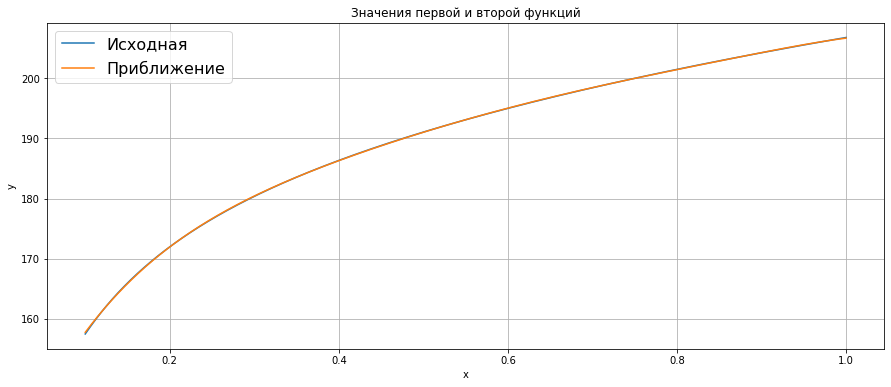

In [20]:
# координаты 
a = np.array([198.22, 14.05, 0.039, -1.33, 10.33, -0.125, -0.337])

#степени многочленов 
base1 = [0, 'log', -2, -1, 1, 2, 3]
base2 = [0, 1, 2, 3, 4, 6, 7]
calculate(a, base1, base2)